# 🧾 Sign Language Gesture Recognition - MNIST Dataset
This notebook implements both a **Custom CNN** and a **Transfer Learning (EfficientNetB0)** model for Sign Language Gesture Recognition using the Sign Language MNIST dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models

In [2]:
train_df = pd.read_csv('sign_mnist_train.csv')
test_df = pd.read_csv('sign_mnist_test.csv')

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (27455, 785)
Test shape: (7172, 785)


C:\Users\SOURI\AppData\Local\Temp\ipykernel_16076\2293527106.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train_df, palette='viridis')
C:\Users\SOURI\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\SOURI\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:1281: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly sel

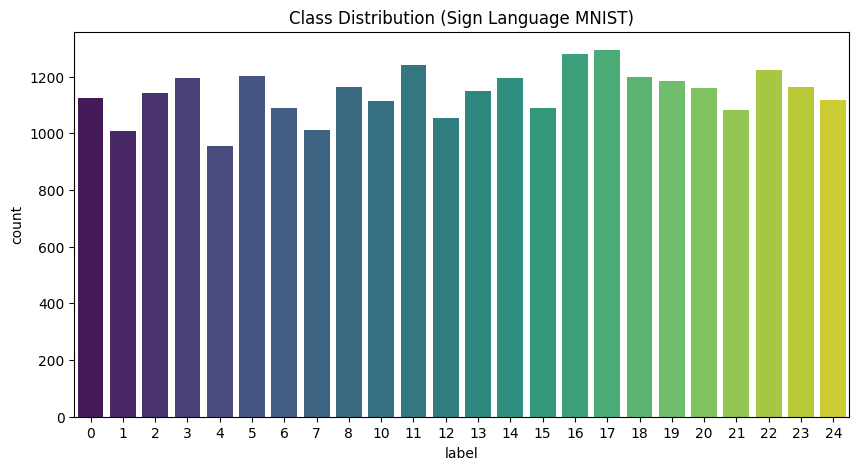

In [3]:
plt.figure(figsize=(10,5))
sns.countplot(x='label', data=train_df, palette='viridis')
plt.title("Class Distribution (Sign Language MNIST)")
plt.show()

In [4]:
X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values

X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (27455, 28, 28, 1)
Testing data shape: (7172, 28, 28, 1)


In [ ]:
import numpy as np
unique_labels = np.unique(y_train)
label_to_index = {lab:i for i, lab in enumerate(sorted(unique_labels))}
if not np.array_equal(unique_labels, np.arange(len(unique_labels))):
    y_train = np.vectorize(label_to_index.get)(y_train)
    y_test  = np.vectorize(label_to_index.get)(y_test)
NUM_CLASSES = len(unique_labels)
print('NUM_CLASSES =', NUM_CLASSES, '| Train label range:', y_train.min(), 'to', y_train.max())

NUM_CLASSES = 24 | Train label range: 0 to 23


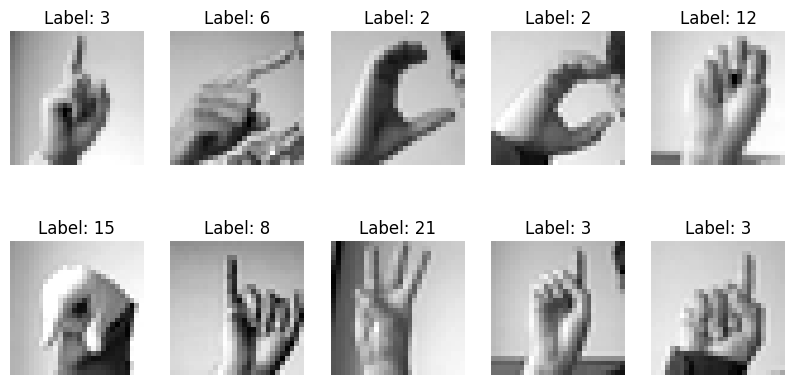

In [6]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.title("Label: " + str(y_train[i]))
    plt.axis('off')
plt.show()

In [7]:
from tensorflow.keras import backend as K
K.clear_session()

cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

C:\Users\SOURI\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,224 (887.59 KB)

 Trainable params: 227,032 (886.84 KB)

 Non-trainable params: 192 (768.00 B)

In [8]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

history_cnn = cnn_model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50


C:\Users\SOURI\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


429/429 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.5468 - loss: 1.4713 - val_accuracy: 0.4663 - val_loss: 1.8103
Epoch 2/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.8281 - loss: 0.5086 - val_accuracy: 0.9530 - val_loss: 0.1635
Epoch 3/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.8959 - loss: 0.3021 - val_accuracy: 0.8289 - val_loss: 0.6311
Epoch 4/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9221 - loss: 0.2271 - val_accuracy: 0.9314 - val_loss: 0.2364
Epoch 5/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9427 - loss: 0.1746 - val_accuracy: 0.9568 - val_loss: 0.1212
Epoch 6/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9491 - loss: 0.1509 - val_accuracy: 0.8967 - val_loss: 0.3293
Epoch 7/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9573 - loss: 0.1279 - val_accuracy: 0.9665 - val_loss: 0.1150
Epoch 8/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9611 - loss: 0.1175 - val_accurac

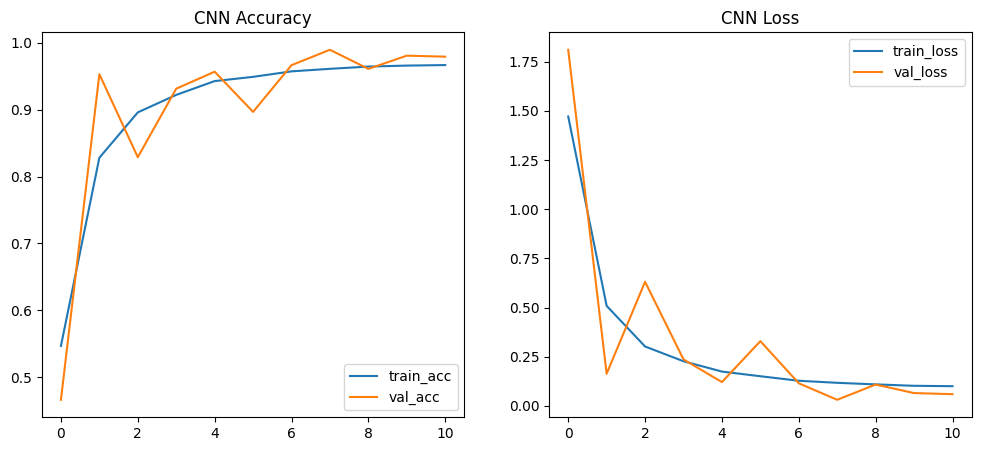

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_cnn.history['accuracy'], label='train_acc')
plt.plot(history_cnn.history['val_accuracy'], label='val_acc')
plt.title('CNN Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history_cnn.history['loss'], label='train_loss')
plt.plot(history_cnn.history['val_loss'], label='val_loss')
plt.title('CNN Loss')
plt.legend()
plt.show()

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       432
           2       1.00      1.00      1.00       310
           3       1.00      1.00      1.00       245
           4       1.00      0.96      0.98       498
           5       1.00      1.00      1.00       247
           6       1.00      0.93      0.96       348
           7       0.96      1.00      0.98       436
           8       1.00      1.00      1.00       288
           9       0.98      1.00      0.99       331
          10       1.00      1.00      1.00       209
          11       0.97      1.00      0.99       394
          12       1.00      1.00      1.00       291
          13       1.00      1.00      1.00       246
          14       1.00      1.00      1.00       347
          15       1.00      1.00      1.00       164
          16    

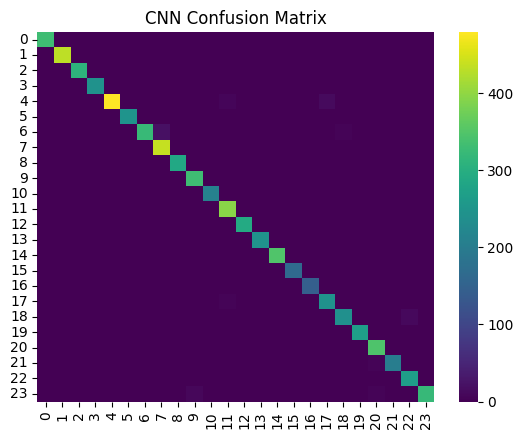

In [14]:
# Evaluate custom CNN
y_pred_cnn = np.argmax(cnn_model.predict(X_test), axis=1)
print("Classification Report:\n", classification_report(y_test, y_pred_cnn))
sns.heatmap(confusion_matrix(y_test, y_pred_cnn), cmap='viridis', annot=False)
plt.title("CNN Confusion Matrix")
plt.show()

In [15]:
cnn_model.save('cnn_sign_language_model.h5')